In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df=pd.DataFrame(df)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
col=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns=col,inplace=True)
df.sample(5)

,v1,v2
3875,ham,did u get that message
3357,ham,I don't run away frm u... I walk slowly &amp; ...
1496,ham,I'm always on yahoo messenger now. Just send t...
2737,ham,Hi Chachi tried calling u now unable to reach ...
3664,ham,Ha... U jus ate honey ar? So sweet...


In [5]:
df.rename(columns={'v1': 'label'}, inplace=True)
df.rename(columns={'v2': 'text'}, inplace=True)
df.head()



,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.index

RangeIndex(start=0, stop=5572, step=1)

In [7]:
#Checking for null values
df.isnull().any()

label    False
text     False
dtype: bool

In [8]:
df.shape

(5572, 2)

In [9]:
#checking for duplicate values
df.drop_duplicates()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.shape

(5572, 2)

In [11]:
print(df['label'].value_counts())

ham     4825
spam     747
Name: label, dtype: int64


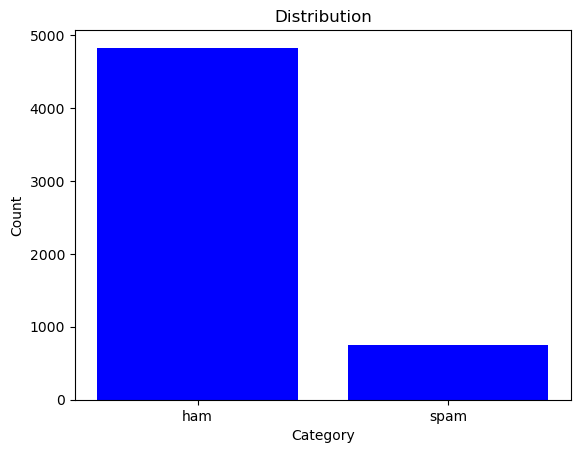

In [12]:
#EDA
x_axis=['ham','spam']
plt.bar(x_axis,df['label'].value_counts(),color='blue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution")
plt.show()

In [13]:
#Number of characters
df['No of characters']=df['text'].apply(len)
df.head()

,label,text,No of characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
#Number of words
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
df['No of words']=df['text'].apply(lambda x:len(word_tokenize(x)))
df['No of sentences']=df['text'].apply(lambda x:len(sent_tokenize(x)))
df.head()
                                   


,label,text,No of characters,No of words,No of sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[df['label']=='ham'][['No of characters','No of words','No of sentences']].describe()

,No of characters,No of words,No of sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
#We can see the major diffrence in the mean :A spam is longer than a ham on an average
df[df['label']=='spam'][['No of characters','No of words','No of sentences']].describe()

,No of characters,No of words,No of sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [18]:
#Split into two data frames (Ham_data and Spam_data)
Ham_data=df[df['label']=='ham']
Spam_data=df[df['label']=='spam']


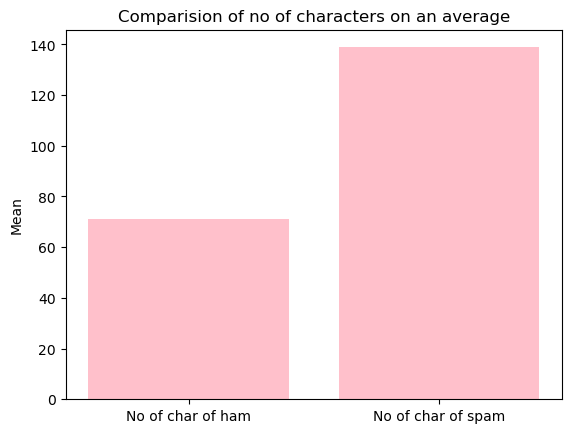

In [19]:
#Comparing the no of characters
a=Ham_data['No of characters'].mean()
b=Spam_data['No of characters'].mean()

X_axis=['No of char of ham','No of char of spam']
Y_axis=[a,b]
plt.bar(X_axis,Y_axis,color='pink')
plt.ylabel("Mean")
plt.title("Comparision of no of characters on an average")
plt.show()

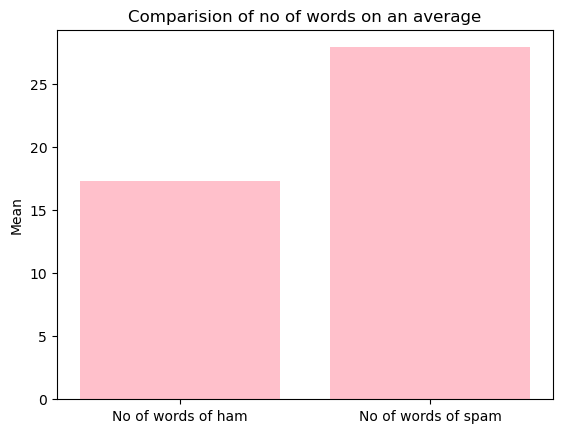

In [20]:
 #Comparing the no of words
a=Ham_data['No of words'].mean()
b=Spam_data['No of words'].mean()

X_axis=['No of words of ham','No of words of spam']
Y_axis=[a,b]
plt.bar(X_axis,Y_axis,color='pink')
plt.ylabel("Mean")
plt.title("Comparision of no of words on an average")
plt.show()

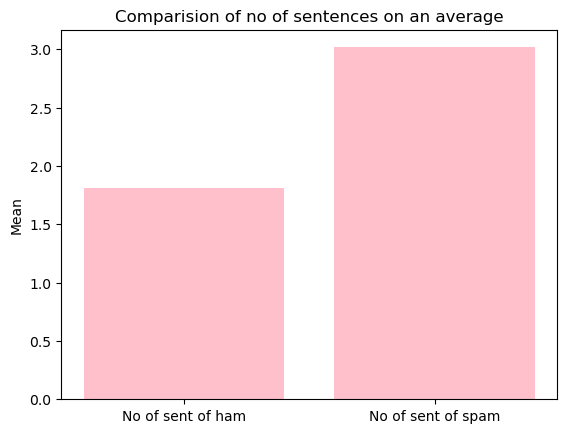

In [21]:
#Comparing the no of sentences
a=Ham_data['No of sentences'].mean()
b=Spam_data['No of sentences'].mean()

X_axis=['No of sent of ham','No of sent of spam']
Y_axis=[a,b]
plt.bar(X_axis,Y_axis,color='pink')
plt.ylabel("Mean")
plt.title("Comparision of no of sentences on an average")
plt.show()

## Inference:
#we infer that on an average the spam message is always longer than a legitimate (ham) message in accordance with number of characters,words and sentences

In [22]:
#Encoding the label column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.head()

,label,text,No of characters,No of words,No of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<AxesSubplot:>

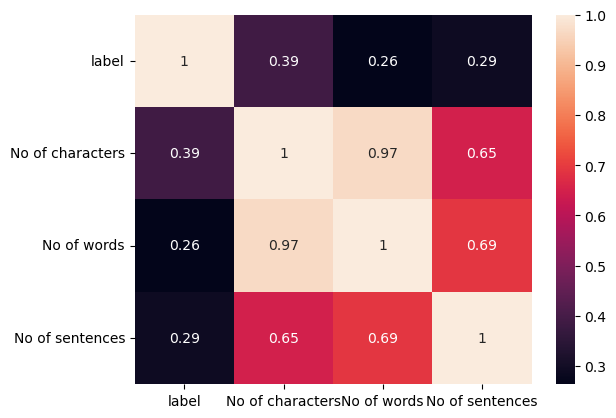

In [23]:
#Analyzing the correlation between number of characters,words,sentences and the category using a heat map
sns.heatmap(df.corr(),annot=True)
# There is highest correlation between no of characters and label

In [24]:
#Data Preprocessing 
def clean(text):
    
    text = re.sub(r'[^a-zA-Z]',' ',text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    return text

df['text'] = df['text'].apply(lambda x: clean(x))
df.head()

,label,text,No of characters,No of words,No of sentences
0,0,go until jurong point crazy available only in ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry in a wkly comp to win fa cup final ...,155,37,2
3,0,u dun say so early hor u c already then say,49,13,1
4,0,nah i don t think he goes to usf he lives arou...,61,15,1


In [25]:
#removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
df['text'] = df['text'].apply(lambda x: removestopwords(x))
df.head()

,label,text,No of characters,No of words,No of sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah think goes usf lives around though,61,15,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             5572 non-null   int32 
 1   text              5572 non-null   object
 2   No of characters  5572 non-null   int64 
 3   No of words       5572 non-null   int64 
 4   No of sentences   5572 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 196.0+ KB


In [27]:
#Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()

def stemming(text):
    lst=text.split()
    stemmed_words=[]
    for x in lst:
        stemmed_words.append(ps.stem(x))
    return stemmed_words
df['text']=df['text'].apply(lambda x:stemming(x))
        

In [28]:
df.head()

,label,text,No of characters,No of words,No of sentences
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",111,24,2
1,0,"[ok, lar, joke, wif, u, oni]",29,8,2
2,1,"[free, entri, wkli, comp, win, fa, cup, final,...",155,37,2
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",49,13,1
4,0,"[nah, think, goe, usf, live, around, though]",61,15,1


In [29]:
print(type(df['text'][0]))

<class 'list'>


In [30]:
def lst_to_string(text):
    
    return ' '.join(text)
df['text']=df['text'].apply(lambda x:lst_to_string(x))
df.head()




,label,text,No of characters,No of words,No of sentences
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri wkli comp win fa cup final tkt st m...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 

X=tfidf.fit_transform(df['text']).toarray()
y=df['label'].values
#splitting training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [33]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [34]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test,y_pred1)*100)

Accuracy score is:  86.3677130044843


In [35]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of is: ',accuracy_score(y_test,y_pred2)*100)

Accuracy score of is:  96.7713004484305


In [36]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of is: ',accuracy_score(y_test,y_pred3)*100)

Accuracy score of is:  97.66816143497758


## Best accuracy score
Model with comparitively best accuracy score : Bernoulli NB (97 %)

In [38]:
#classification
for i in y_pred3:
    if i==1:
        print(i,"spam")
    else:
        print(i,"ham")


0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
1 spam
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
1 spam
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0 ham
0